# **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Data loading**

In [5]:
data = pd.read_csv("multiple_linear_regression.csv")

In [6]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# **Data Preprocessing**

In [8]:
data = data.dropna()
data.shape

(200, 4)

In [9]:
output_col = "Target"

In [10]:
x = data.iloc[:,data.columns != output_col] # input

In [11]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
y = data.loc[:,output_col]    # output

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 43)

In [15]:
data.shape

(200, 4)

In [16]:
x_train.shape

(140, 3)

In [17]:
y_train.shape

(140,)

# **Multiple Linear Regression**

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [20]:
regressor.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [21]:
regressor.intercept_

3.0777744955280415

# **prediction**

In [22]:
pred_value = regressor.predict(x_test)

# **cost**

In [23]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test, pred_value)

In [24]:
cost

2.241286253093347

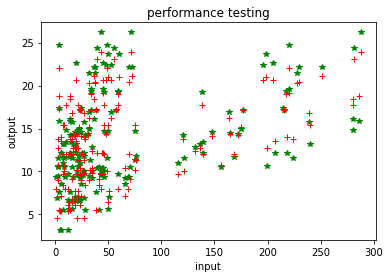

In [27]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test,pred_value,"+", color = "red")
plt.title("performance testing")
plt.xlabel("input")
plt.ylabel("output")
plt.show()